Supervised Learning algorithms, which is used for Classification as well as Regression problems.

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.


![alt text](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

**Types of SVM**

SVM can be of two types:

**Linear SVM:**

 Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

**Non-linear SVM:**

Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.
Hyperplane and Support Vectors in the SVM algorithm:

**Hyperplane :**
 
 best decision boundary that helps to classify the data points,that has a maximum margin, which means the maximum distance between the data points.


 **Support Vectors:**

The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector. Since these vectors support the hyperplane, hence called a Support vector.



**Linear SVM**

the SVM algorithm helps to find the best line or decision boundary; this best boundary or region is called as a hyperplane. SVM algorithm finds the closest point of the lines from both the classes. These points are called support vectors. The distance between the vectors and the hyperplane is called as margin. And the goal of SVM is to maximize this margin. The hyperplane with maximum margin is called the optimal hyperplane

**Non linear SVM**

In the scenario below, we can’t have linear hyper-plane between the two classes, 

![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_8.png)


we can solves this problem by introducing additional feature. Here, we will add a new feature z=x^2+y^2. Now, let’s plot the data points on axis x and z:


![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_9.png)



in the original plot, red circles appear close to the origin of x and y axes, leading to lower value of z and star relatively away from the origin result to higher value of z.

SVM  algorithm has a technique called the kernel trick. The SVM kernel is a function that takes low dimensional input space and transforms it to a higher dimensional space i.e. it converts not separable problem to separable problem. It is mostly useful in non-linear separation problem. 

**Parameter for SVM**

Kernel: 'rbf', 'poly','linear'

Gamma: higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

c : Penalty parameter C of the error term. It also controls the trade-off between smooth decision boundaries and classifying the training points correctly.

**SVM for regression**

In [47]:
# Support Vector Regression (SVR)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/Uttam580/Machine_learning/master/datasets./Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [48]:
y = y.reshape(-1,1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [49]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

# Predicting a new result
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([170370.0204065])

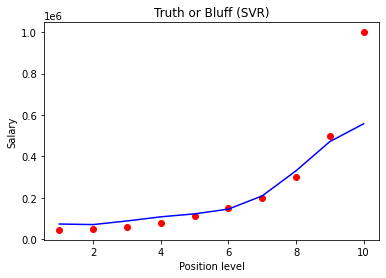

In [50]:
# Visualising the SVR results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Text(0, 0.5, 'Salary')

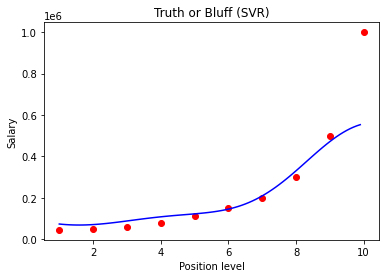

In [51]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')

**SVM for classification**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [0]:
# import some data to play with
iris = datasets.load_iris()

In [54]:
iris.data[1:3]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [55]:
iris.target[:3]

array([0, 0, 0])

In [0]:
X = iris.data[:, :2] # we only take the first two features. 
y = iris.target

In [0]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc1 = svm.SVC(kernel='linear', C=1).fit(X, y)

In [0]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

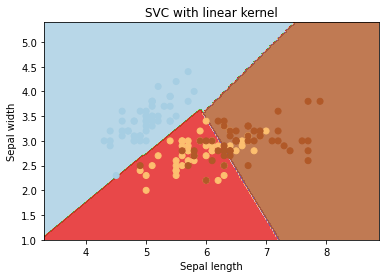

In [59]:
plt.subplot(1, 1, 1)
Z = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

**SVM with rbf kernel** 

In [0]:
svc2 = svm.SVC(kernel='rbf', C=1).fit(X, y)

In [0]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

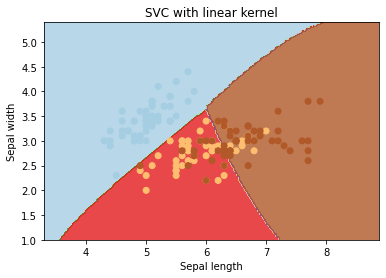

In [62]:
plt.subplot(1, 1, 1)
Z = svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [0]:
svc3 = svm.SVC(kernel='rbf',gamma=10, C=1).fit(X, y) #higher gamma, model will be overfit to training dataset

In [0]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

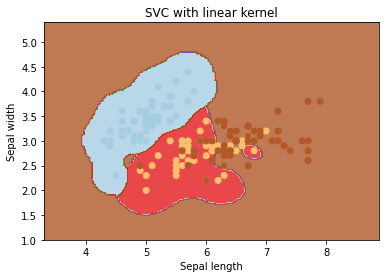

In [65]:
plt.subplot(1, 1, 1)
Z = svc3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [0]:
svc4 = svm.SVC(kernel='rbf', C=10).fit(X, y) #higher gamma, model will be overfit to training dataset
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

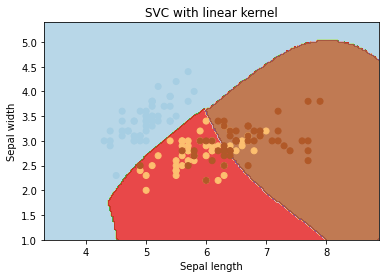

In [67]:
plt.subplot(1, 1, 1)
Z = svc4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

**SVM on classification** 

In [0]:
# Support Vector Machine (SVM)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/Uttam580/Machine_learning/master/datasets./Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [73]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


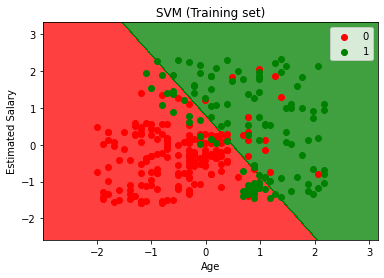

In [74]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


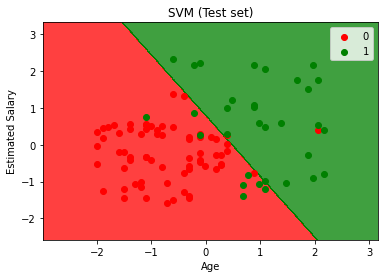

In [75]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()